# [OpenFOAM Simulations in a nutshell](https://foam-school.github.io/docs/part1/openfoam-simulation-in-a-nutshell/) (Diffusive flow simulation)

### 0. Install needed libraries

In [1]:
# These are shell commands
! sudo apt-get install python3-matplotlib python3-pip python3-pandas python3-docutils -y > /dev/null
! sudo pip3 install ply zeroconf psutil pyFoam > /dev/null

The directory '/home/of/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/of/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.


### 1. Imports and initial configuration

We make sure plots are "inlined", import an improved `DataFrame` class and prepare the case directory for processing

In [2]:
# If you don't know Python, don't worry about these lines. Just run-n-skip -em

import subprocess

%matplotlib inline
from matplotlib import pyplot as plt

from PyFoam.Wrappers.Pandas import PyFoamDataFrame as DataFrame
from PyFoam.IPythonHelpers import storage
from PyFoam.IPythonHelpers.Case import Case

store=storage()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Then, we import the `Case` class and instantiate our case object 
(The abolute path is given _relative_ to the "docker container")

In [3]:
casePath = subprocess.run(['pwd'], stdout=subprocess.PIPE).stdout[:-1].decode("utf-8")
print("Case:", casePath)
# Pass the absolute path to the case to Case class
case=Case(casePath)

Case: /home/of/OpenFOAM/of-dev/run/intro


### 2. Investigating the case

Retrieve some mesh statistics (Use `case.<TAB>` to learn more) as HTML objects

In [4]:
# First, make sure the mesh is there
! blockMesh > /dev/null

In [5]:
# Then inspect mesh size (Use case.<Tab> to see what else is available!!)
case.size()

Faces,46
Points,40
Cells,9


In [6]:
# Length here denotes how many faces are on the boundary patch
case.boundaryConditions()

<!-- -->,inlet,noFlow,outlet
Patch Type,patch,empty,patch
Length,1,36,1
T,fixedValue,empty,fixedValue
U,zeroGradient,empty,zeroGradient


You can even verify fields' dimensions here 

In [7]:
case.dimensions()

Name,kg,m,s,K,mol,A,cd
T,0,0,0,1,0,0,0
U,0,1,-1,0,0,0,0


and also the variables values at cell centers for time 0 (initial time)

In [8]:
case.internalField()

Name,Value
T,uniform 0
U,uniform (0.03 0 0)


Finally, the numerical solver's settings

In [9]:
case.linearSolvers()
# Or you can type "case." and press <TAB> to get a list of available methods

Name,Solver,Abs. Tolerance,Relative Tol.
T,PBiCG,1e-07,1e-05


### Preparing and running the case

In [10]:
### For Python First-Timers

# Clean things, build the mesh and run the solver, keeping a log of the run
# There are better ways to do this, but because it's your first time, do it from the shell:
! foamCleanTutorials && blockMesh > /dev/null
! scalarTransportFoam | tee log.scalarTransportFoam

Cleaning /home/of/OpenFOAM/of-dev/run/intro case
/*---------------------------------------------------------------------------*\
  =========                 |
  \\      /  F ield         | OpenFOAM: The Open Source CFD Toolbox
   \\    /   O peration     | Website:  https://openfoam.org
    \\  /    A nd           | Version:  dev
     \\/     M anipulation  |
\*---------------------------------------------------------------------------*/
Build  : dev-986d206e1840
Exec   : scalarTransportFoam
Date   : Nov 14 2020
Time   : 20:18:46
Host   : "1655614f3dc5"
PID    : 3203
I/O    : uncollated
Case   : /home/of/OpenFOAM/of-dev/run/intro
nProcs : 1
sigFpe : Enabling floating point exception trapping (FOAM_SIGFPE).
fileModificationChecking : Monitoring run-time modified files using timeStampMaster (fileModificationSkew 10)
allowSystemOperations : Allowing user-supplied system call operations

// * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * //
Create time

Create mes

In [11]:
### For Python programmers, there is a "PyFoam" Package to automate OpenFOAM stuff

# Use PyFoam as a library to launch simulations
from PyFoam.Applications.Runner import Runner


# Clear the case, show only the progress,
# Choose scalarTransportFoam, and provide case absolute path as its option
rn = Runner(args=["--clear","--progress","scalarTransportFoam","-case",case.path])

Clearing out old timesteps ....
 t =          3Killing PID 3213


 PyFoam WARNING on line 42 of file /usr/local/lib/python3.6/dist-packages/PyFoam/Infrastructure/ServerBase.py : No certficate file /home/of/.pyFoam/foamServerCertificate.cert exists. Therefor no SSL-connection for the FoamServer possible
 To generate a private key:
    openssl genrsa -out /home/of/.pyFoam/foamServerCertificate.key 2048 
Then generate the cerificate that is valid for 3 years with 
    openssl req -new -x509 -key /home/of/.pyFoam/foamServerCertificate.key -out /home/of/.pyFoam/foamServerCertificate.cert -days 1095 


In [12]:

# Notice that
# PyFoam application options start with --
# OpenFOAM solver options start with a single -

# On commandline, you can run:
! pyFoamRunner.py --clear --progress scalarTransportFoam -case .

# You can increase the number of timesteps; you'll only time progress here

Clearing out old timesteps ....
 PyFoam WARNING on line 42 of file /usr/local/lib/python3.6/dist-packages/PyFoam/Infrastructure/ServerBase.py : No certficate file /home/of/.pyFoam/foamServerCertificate.cert exists. Therefor no SSL-connection for the FoamServer possible
 To generate a private key:
    openssl genrsa -out /home/of/.pyFoam/foamServerCertificate.key 2048 
Then generate the cerificate that is valid for 3 years with 
    openssl req -new -x509 -key /home/of/.pyFoam/foamServerCertificate.key -out /home/of/.pyFoam/foamServerCertificate.cert -days 1095 
 t =          3Killing PID 3268


### Investigating the run

In [13]:
# Get simulation Data as a Python dictionary
data = rn.getData()

In [14]:
# Discover what info is stored
data.keys()

dict_keys(['lines', 'uniqueid', 'logfile', 'casefullname', 'casename', 'solver', 'solverFull', 'commandLine', 'hostname', 'remark', 'starttime', 'time', 'stepNr', 'lasttimesteptime', 'analyzed', 'keyboardInterrupt', 'interrupted', 'OK', 'endSeen', 'cpuTime', 'cpuUserTime', 'cpuSystemTime', 'wallTime', 'usedMemory', 'endtime', 'fatalError', 'fatalFPE', 'fatalStackdump'])

In [15]:
# Has the run finished OK?
rn.OK

True

In [16]:
# If failed, is it an OpenFOAM Fatal Error?
rn.fatalError

False

In [17]:
# Or was the run interrupted
rn.interrupted

False

In [18]:
# Was there a run "remark" (For over-the-network simulations)
rn.remark

'No remark given'

In [19]:
# CPU TIME (don't expect much here, it's 9 cells!)
rn.cpuSystemTime, rn.cpuUserTime, rn.cpuTime

(0.0, 0.0, 0.0)

In [20]:
# Newest time directory
case.sol.latestDir()

'/home/of/OpenFOAM/of-dev/run/intro/3'

In [21]:
# Take a look at everything
data.values()

dict_values([54, '9a4bf190-26b6-11eb-add7-0242ac110002', '/home/of/OpenFOAM/of-dev/run/intro/PyFoamRunner.scalarTransportFoam.logfile', '/home/of/OpenFOAM/of-dev/run/intro', 'intro', 'scalarTransportFoam', 'scalarTransportFoam', 'scalarTransportFoam -case /home/of/OpenFOAM/of-dev/run/intro', '1655614f3dc5', 'No remark given', 'Sat Nov 14 20:18:47 2020', 3.0, 3, 'Sat Nov 14 20:18:48 2020', {'Linear': {'T': 3.1673702e-16, 'T_final': 3.1673702e-16, 'T_iterations': 0.0}, 'Iterations': {'T': 0.0}}, False, False, True, True, 0.0, 0.0, 0.0, 0.12264227867126465, 0.0, 'Sat Nov 14 20:18:48 2020', False, False, False])

### The list of T values

What we *really* want to extract in this case is the `nonuniform list of T` at time = 3!

In [22]:
case.internalField(time=3.0)
# But this is HTML!! can't plot, can't do much with the data

Name,Value
T,nonuniform List<scalar> 9...
U,uniform (0.03 0 0)
phi,uniform 0.0003


In [23]:
# An alternative way, for this case, is to directly parse 2/T file

# Import parsedFile class as sf
from PyFoam.RunDictionary.ParsedParameterFile import ParsedParameterFile as sf

# The 3/T file representation
T = sf(case.sol.latestDir()+'/T')

# What keywords the file has?
print("3/T content: %s\n" % T.content.keys())

# Extract the list of values  as a python list
print("T at cell center: %s" % T.content['internalField'].value())

3/T content: ['dimensions', 'internalField', 'boundaryField']

T at cell center: [0.98942794, 0.96082118, 0.92211791, 0.86975468, 0.79891029, 0.70306201, 0.57338493, 0.39793946, 0.16057206]


Text(0,0.5,'T')

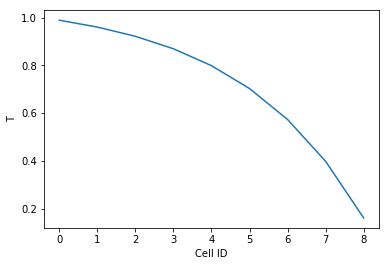

In [24]:
# Plot T values at cell centers, there you go:
plt.plot(T.content['internalField'].value())
plt.xlabel("Cell ID")
plt.ylabel("T")